Investigate a simple system where you only have two neurons connected to each other with only gap junctions.
This means there are only two state variables: V1, V2.
Eh. Uninteresting. Because linear system, then only 1 equilibrium, and the jacobi

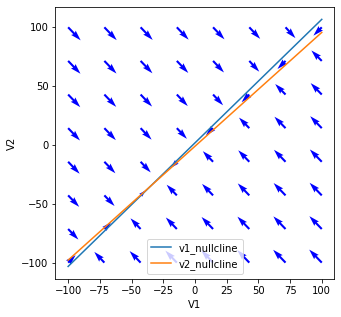

In [2]:
import matplotlib.pylab as plt
import numpy as np
#%matplotlib notebook

C = 0.015
Gc = 0.1
Ec = -35.0
# Gap junctions
G12 = 2
G21 = 3

def dv1_dt(v1, v2, Iext1):
  leak_current = Gc * (v1 - Ec)
  gap_current = G12 * (v1 - v2)
  return (- leak_current - gap_current + Iext1) / C

def dv2_dt(v1, v2, Iext2):
  leak_current = Gc * (v2 - Ec)
  gap_current = G21 * (v2 - v1)
  return (- leak_current - gap_current + Iext2) / C

# V2 in terms of V1 when dv1/dt = 0
def v1_nullcline(v1, Iext1):
  return (Gc * (v1 - Ec) + G12 * v1 - Iext1) / G12

# V2 in terms of V2 when dv2/dt = 0
def v2_nullcline(v1, Iext2):
  return (Gc * Ec + G21 * v1 + Iext2) / (Gc + G21)

def rescale_log(val):
  mag = np.log(np.abs(val))
  if val < 0:
    return -mag
  else:
    return mag

def plot_phase_portrait(Iext1, Iext2, min_max_scale):
  num_dots = 7
  x1min = -1 * min_max_scale
  x1max = min_max_scale
  x1spacing = min_max_scale / num_dots * 2
  x1list = np.arange(x1min, x1max+x1spacing, x1spacing)
  x2min = -1 * min_max_scale
  x2max = min_max_scale
  x2spacing = min_max_scale / num_dots * 2
  x2list = np.arange(x2min, x2max+x2spacing, x2spacing)
  x1mat, x2mat = np.meshgrid(x1list, x2list)

  dx1_dt_mat = np.zeros(x1mat.shape)
  dx2_dt_mat = np.zeros(x2mat.shape)

  for i in range(x1mat.shape[0]):
    for j in range(x1mat.shape[1]):
      x1 = x1mat[i][j]
      x2 = x2mat[i][j]
      # Have to rescale with log or else we won't see the diagonal magnitudes.
      dx1_dt_mat[i][j] = rescale_log(dv1_dt(x1, x2, Iext1))
      dx2_dt_mat[i][j] = rescale_log(dv2_dt(x1, x2, Iext2))
  
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
  ax.quiver(x1mat, x2mat, dx1_dt_mat, dx2_dt_mat, color = 'blue')
  ax.plot(x1list, v1_nullcline(x1list, Iext1), label = "v1_nullcline")
  ax.plot(x1list, v2_nullcline(x2list, Iext2), label = "v2_nullcline")
  ax.set_xlabel("V1")
  ax.set_ylabel("V2")
  ax.legend()
  return fig, ax
  
_ = plot_phase_portrait(Iext1 = 0, Iext2 = 0, min_max_scale = 100)

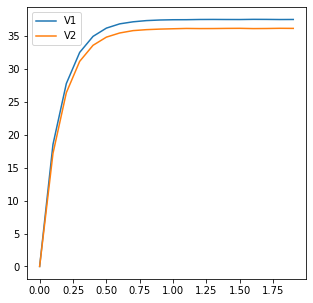

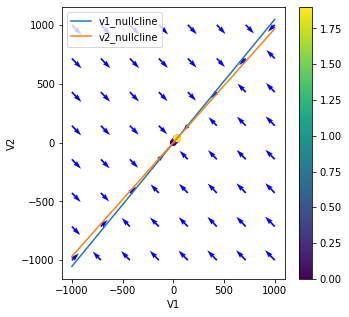

In [5]:
import scipy.integrate as integrate
# Plot V(t) and phase portrait trajectory for given initial conditions (v1,v2) and the injected currents.
def plot_trajectory(v1, v2, Iext1, Iext2):
  def dyn(t, state_vars):
    v1 = state_vars[0]
    v2 = state_vars[1]
    return [dv1_dt(v1, v2, Iext1), dv2_dt(v1, v2, Iext2)]
  
  # Plot V(t)
  dt = 0.1
  t_max = 2
  t_span = [0, t_max]
  t_eval = np.arange(0, t_max, dt)
  sol = integrate.solve_ivp(dyn, t_span, [v1, v2], method = 'RK45', t_eval = t_eval)
  
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
  ax.plot(sol.t, sol.y[0], label = "V1")
  ax.plot(sol.t, sol.y[1], label = "V2")
  ax.legend()
  
  min_max_scale = 1000
  fig, ax = plot_phase_portrait(Iext1, Iext2, min_max_scale)
  p = ax.scatter(sol.y[0], sol.y[1], c = sol.t, cmap = 'viridis')
  plt.colorbar(p)
  
plot_trajectory(v1 = 0, v2 = 0, Iext1 = 10, Iext2 = 3)